# Machine Learning

Machine learning refers to the ability of computers (machines) to learn without being explicitly programmed. That is, given new data, the program is able to improve its performance on a particular task, such as image recognition (e.g. cat vs. dog) or predicting the revenue generated from advertising in a particular medium (newspaper, radio, tv).

The two main branches of machine learning are called "supervised" and "unsupervised" learning. 

In supervised learning, each observation has a set of features (or input variables) $\boldsymbol{x}$ associated with some label $y$. Our goal is then to be able to predict $y$ given the features $\boldsymbol{x}$. In unsupervised learning we have no labels, so the goal becomes to identify structure in the data. One example of unsupervised learning would be Amazon's recommendation system, where a machine examines numerous purchases (the *features*) and learns to recommend products that you will be more likely to buy given your purchasing history.

### Supervised Learning


Supervised learning usually involves either *regression* or *classification*. In regression, the output $y$ can take on an infinite number of values $(y \in {\bf R})$, such as trying to predict the cost of a house $\hat{y}$ given its size in square meters $x$, where the $\hat{}$ is used to denote our predicted value (in contrast to the true value $y$). Linear regression is one example, which can be written as

$$\hat{y}(x) = \beta_{0} + \beta_{1} x$$

The goal then becomes to identify the best values of $\beta_{0}$ (the intercept) and $\beta_{1}$ (the slope). We could then feed in many values of $x$ and have the machine make a prediction $\hat{y}$. Based on the error $y - \hat{y}$ (usually the squared error), the machine will update its estimates of $\beta_{0}$ and $\beta_{1}$ to improve its estimate of $\hat{y}$. 

While linear regression is fairly basic, there are complex algorithms that can be used for making predictions, such as *Neural Networks*, *Support Vector Regression* and *Random Forest*.

In classification, the output $y$ takes on only a discrete number of values, such as land cover types in a certain area. We then take the features $\boldsymbol{x}$ and based on their labels, train a model to predict the label (or class) given the feature values. *Logistic regression* and *Linear Discriminant Analysis (LDA)* are similar to linear regression but for classification, while neural networks, *Support Vector Machines (SVM)* and random forest are among the more popular complex classifiers.

### Unsupervised Learning

The most common type of unsupervised learning is clustering, where we try to group objects into similar categories (or clusters) based on similarities in their features. Perhaps the most popular method is K-means clustering.

In K-means clustering, we begin with our unlabeled observation and desire to cluster the observations into $K$ groups.

In the first stage, we need to initialize the cluster centroids. One method is to randomly assign each observation to one of the $K$ classes, as shown in "Step 1" in the figure below. The cluster centroids are then found by finding the centroid of all the observations in the cluster ("Iteration 1, Step 2a").

In the next step, we re-assign every observation to the nearest cluster, as shown in "Iteration 1, Step 2b", and then update the cluster centroids ("Iteration 2, Step 2a"). This iteration process is then repeated many times until no changes occur.

![](http://4.bp.blogspot.com/--0Q3Tqd4Ux0/Uv4VLhZym8I/AAAAAAAAOBM/tDWhRke97K4/s1600/cluster_5.PNG)

Image is from the book [Introduction to Statistical Learning](http://link.springer.com/book/10.1007/978-1-4614-7138-7), which is often available to students free via the University's suscription to Springer Link.

### Political Districting - Weighted K-means

The issue of Gerrymandering 


$$
d \propto \arcsin\left(\sqrt{\sin^{2}\left(\frac{\Delta \phi}{2}\right) + \cos{\phi_{1}} \cos{\phi_{2}} \sin^{2}\left(\frac{\Delta \lambda}{2}\right)}\right)
$$

where $\Delta \phi$ is the angular distance between the two latitudes $\phi_{1}$ and $\phi_{2}$ and $\Delta \lambda$ is the angular distance between the two longitudes $\lambda_{1}$ and $\lambda_{2}$.

## Loading the Modules

For basic scripts the modules (libraries) you need will usually be in your working directory or the native python directory and python can easily find them. In this case, the modules we will be using are located in the "python" folder. If you aren't working from this directory, you will have to add this path to the python system so it knows where to find the modules. This can be done using the following commands

In [1]:
import sys
sys.path.append('python')

Where the term in quotes '...' is the filepath. Now we can import the kmeans module by running the following command:

In [2]:
from kmeans import *

The module uses the python modules [pandas](http://pandas.pydata.org/) and [us](https://pypi.python.org/pypi/us), which you may need to download. [numpy](http://www.numpy.org/) and [matplotlib](https://matplotlib.org/) will also be used, although these are usually included in the python installation.

## Using the kmeans module

To run the kmeans module, we'll first have to create an instance of the class. This is done by assigning the constructor kmeans() to a variable, which I will call km:

In [3]:
km = kmeans()

The kmeans module uses the function *_loadData(fn, id, L48=False, DC=True)* to read in the census data file. It takes four variables. *fn* is the filename to be loaded in, which is 'usa.txt'. I currently have 'usa.txt' stored in the folder 'census', so I would need to specify the path as well:

    fn = 'census/usa.txt'

On a windows system, this would instead be

    fn = 'census\usa.txt'
    
*id* is either a string of a list of strings to specify which states to include. If one just wants to look at the census blocks that are part of Iowa, then one would set either

    id = 'IA'
    id = ['IA']
    
If one wants to use use more than one state, but not the entire US, then one can pass a list of strings. So to use just Iowa and Minnesota, one would set

    id = ['IA', 'MN']
    
To use the entire US, set

    id = 'us'
    
The last two parameters are optional and are only used when id = 'us'. If L48 is set to true, only the lower 48 states are used (Hawaii and Alaska are removed). If DC is set to true, than Washington D.C. is included and if set to false then excluded.

## Loading the Dataset

With the above information we can now load in the file and extract only the census blocks that are part of Iowa, Minnesota, North Dakota, South Dakota, and Wisconsin:

In [4]:
km._loadData(fn='census/usa.txt', id=['IA', 'MN', 'ND', 'SD', 'WI'])

The blocks are stored in the variable "km.block\_", which is a pandas data frame. We can view the first few lines by using the .head() function,

In [5]:
print(km.block_.head())

                    id        lat        lon     area  pop state
0  15000US190610007024  42.495770 -90.680305   395718  972    IA
1  15000US190610008011  42.475476 -90.660158  3109026  686    IA
2  15000US190610008013  42.482445 -90.671641   770432  839    IA
3  15000US190610007023  42.494709 -90.684289   323103  508    IA
4  15000US190852904001  41.555817 -95.899592  6515805  674    IA


or view the last few rows by using the .tail() function

In [6]:
print(km.block_.tail())

                        id        lat        lon      area   pop state
12451  15000US550630001004  43.859714 -91.223763   5622328  1269    WI
12452  15000US550630102014  43.965542 -91.257365   2014676  1922    WI
12453  15000US550630105004  43.873687 -91.231568   2461659  2024    WI
12454  15000US550630104013  43.925140 -91.145882  29780145  1157    WI
12455  15000US550630105002  43.880722 -91.224059    526193  1024    WI


The *id* column is the 'GEOID_1' column in the original census block file, while *lat* and *lon* are 'INTPTLAT' and 'INTPTLON' respectively; *area* is the land area ('ALAND') and *pop* is the population ('B01001e1').

To verify that we only have blocks within the 5 chosen states, we can select the unique elements in the *state* column by using the *set()* function, which is built into python. The column can be selected by passing the column name as a string into a [] after calling the data frame.

In [7]:
states = set(km.block_['state'])
print(states)

{'MN', 'SD', 'ND', 'IA', 'WI'}


To list the states in order by alphabet, we can convert the set to a list and then use the *.sort()* method, which is built into python lists:

In [8]:
states = list(states)
states.sort()
print(states)

['IA', 'MN', 'ND', 'SD', 'WI']


## Plotting the States

We'll be using the matplotlib library, which can be loaded using the import command:

In [9]:
import matplotlib.pyplot as plt

Rather than typing matplotlib.pyplot each time we want to utilize its functions, we can give it an alias name using the "as" command, as done above. Now we can just type in "plt" to reference the function in the module.

### Plotting Iowa

Let's begin by just plotting the location of each of the blocks that are part of Iowa. To do that, we need to find out which rows (block units) are part of Iowa. We can do this by checking if the column 'state' is equivalent to IA:

In [10]:
loc = km.block_['state'] == 'IA'

"loc" is a boolean mask that will allow us to extract only the blocks that are part Iowa. If we print the first few rows we see that these blocks are part of Iowa

In [11]:
print(loc[:5])

0    True
1    True
2    True
3    True
4    True
Name: state, dtype: bool


While printing the last few rows shows that they are not part of Iowa:

In [12]:
print(loc[-5:])

12451    False
12452    False
12453    False
12454    False
12455    False
Name: state, dtype: bool


Compare the booleans with our .head() and .tail() commands above.

We can then extract the latitude and longitude of each block within iowa and plot them as a scatterplot using matplotlib's *scatter()* function as follows:

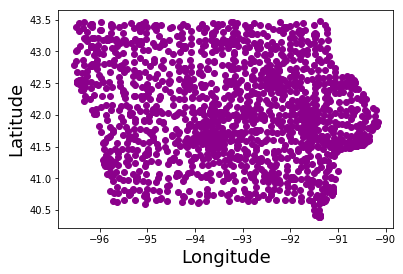

In [13]:
lat = km.block_['lat'][loc]
lon = km.block_['lon'][loc]

plt.scatter(lon, lat, color='darkmagenta')
plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=18)
plt.show()

### Plotting the States as Different Colors

To plot all the states as a different color, we can make use of the colormaps that are part of matplotlib. The following imports matplotlib's colormaps under the alias "cm", and then selects 5 colors [len(states)] over the rainbow colormap and inserts these colors in to the variables "colors".

In [14]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(states)))
print(colors)

[[  5.00000000e-01   0.00000000e+00   1.00000000e+00   1.00000000e+00]
 [  1.96078431e-03   7.09281308e-01   9.23289106e-01   1.00000000e+00]
 [  5.03921569e-01   9.99981027e-01   7.04925547e-01   1.00000000e+00]
 [  1.00000000e+00   7.00543038e-01   3.78411050e-01   1.00000000e+00]
 [  1.00000000e+00   1.22464680e-16   6.12323400e-17   1.00000000e+00]]


The values in the "colors" variable are rgba values, where the last column ('a') refers to the transparency.

To plot each state as a different color, we can iterate through each state, find the rows in *km.block\_* that are part of the state, and plot the latitude and longitude for each of the block units on a scatter plot.

Using the *enumerate()* function will keep track of the current iteration in the for loop. We can then index each color in "colors" by passing in the index "i" into "colors[i]" and setting the color of the points (c) to be equal to this value.

By appending a string to the *label* keyword, we can create a legend, which can then be plotted by calling plt.legend().

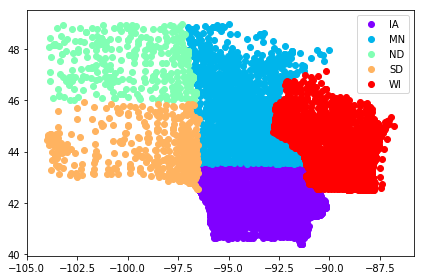

In [15]:
plt.figure(1)
for i, state in enumerate(states):

    # =============================================
    # find each block that is part of the state
    # =============================================
    loc = km.block_['state'] == state

    # =============================================
    # Plot each of these blocks and color-code.
    # =============================================
    plt.scatter(km.block_['lon'][loc], km.block_['lat'][loc], c=colors[i], label=state)

plt.legend(loc='best')
plt.tight_layout()
plt.show()

We can also adjust some features to change the appearance of the plot and use the zip() function to iterate through each color and state simultaneously.

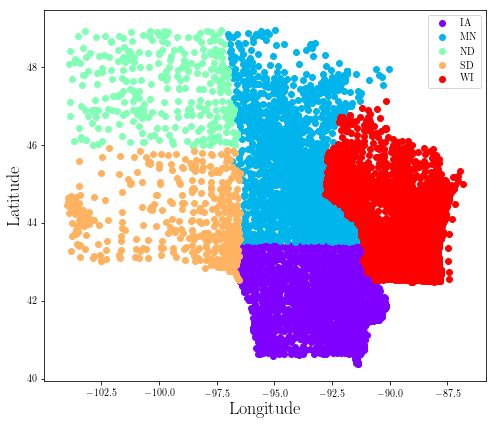

In [16]:
plt.figure(1, figsize=(7,6))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

for color, state in zip(colors, states):

    # =============================================
    # find each block that is part of the state
    # =============================================
    loc = km.block_['state'] == state

    # =============================================
    # Plot each of these blocks and color-code.
    # =============================================
    plt.scatter(km.block_['lon'][loc], km.block_['lat'][loc], c=color, label=state)

plt.legend(loc='upper right')
plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=18)
plt.tight_layout()
plt.show()

## Seeding the Clusters

Before we begin clustering the blocks, we first need to create the initial clusters. This is done using the *_randomCentroid()* function that is part of kmeans by calling

    km._randomCentroid(K, seed=4545)

*K* is an integer that specifies the number of clusters we want ot create (the *K* in *K-means*), while seed is an optional argument for setting the random number seed to insure reproducibility. The *_randomCentroid()* function selects $K$ block locations (without replacement) at random and sets these as the initial cluster (group) locations and stores these values in the *km.group_* pandas dataframe.

Let's initialize 10 clusters for our 5 states and print their locations:

In [17]:
km._randomCentroid(10)
print(km.group_)

         lat        lon  alpha
0  41.688820 -93.062789      1
1  43.054728 -88.113219      1
2  44.948269 -93.143916      1
3  44.202083 -93.705263      1
4  45.565307 -92.458525      1
5  43.670361 -87.891802      1
6  43.299730 -96.273488      1
7  42.748443 -87.796961      1
8  47.929507 -97.025430      1
9  46.906203 -92.331832      1


*alpha* is just a weight that will be used and updated when clustering.

Let's overlay these centroids on the state map that we made earlier. We can do this by adding another for loop that iterates through each cluster and plots the (lon,lat) value on top of the states.

We can change the shape of the marker using the [marker](https://matplotlib.org/api/markers_api.html) keyword and the size by setting a large number for the *s* keyword.

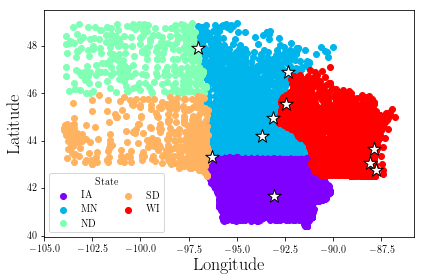

In [18]:
plt.figure(1)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# ==============================================
# Recreate the previous plot of the states
# ==============================================
for i, state in enumerate(states):
    loc = km.block_['state'] == state
    plt.scatter(km.block_['lon'][loc], km.block_['lat'][loc], c=colors[i], label=state)

# ==============================================
# Add the initial group/cluster centers to the 
# plot as large, white stars with a black outline.
# ==============================================
for group in km.group_.index:
    plt.scatter(km.group_['lon'][group], km.group_['lat'][group], 
                s=200, marker='*', c='white', edgecolors='black')

plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=18)
plt.legend(loc='lower left', ncol=2, title='State')
plt.tight_layout()
plt.show()

## Clustering

With our cluster centroids selected, the next step in the algorithm is to assign each block to the nearest cluster. This is done using the *_assignGroup()* function, which computes the (weighted) distance to each of the clusters and selects the cluster that has the lowest value.

It takes no parameters, but rather accesses all the necessary values automatically. It also updates the km.block\_ data frame to show what group the block is currently assigned to.

In [19]:
km._assignGroup()
print(km.block_.head())

                    id       lat       lon     area  pop state  group
0  15000US190610007024  0.741691 -1.582670   395718  972    IA      0
1  15000US190610008011  0.741337 -1.582318  3109026  686    IA      0
2  15000US190610008013  0.741459 -1.582519   770432  839    IA      0
3  15000US190610007023  0.741673 -1.582739   323103  508    IA      0
4  15000US190852904001  0.725286 -1.673764  6515805  674    IA      6


Note that the lat and lon values have now changed. When computing the distances we need to use radians rather than degrees. We can convert back to degrees using the *_rad2deg()* function.

In [20]:
km._rad2deg()
print(km.block_.head())

                    id        lat        lon     area  pop state  group
0  15000US190610007024  42.495770 -90.680305   395718  972    IA      0
1  15000US190610008011  42.475476 -90.660158  3109026  686    IA      0
2  15000US190610008013  42.482445 -90.671641   770432  839    IA      0
3  15000US190610007023  42.494709 -90.684289   323103  508    IA      0
4  15000US190852904001  41.555817 -95.899592  6515805  674    IA      6


Let look at how the blocks are divided, but compare the appearance to the states using subplots.

To create subplots in matplotlib, we use the *plt.subplot(nrow, ncol, num)* function. The first and second parameters specify the number of rows and the number of columns, while the third parameter specifies which plot we are currently working on.

Since we'll compare two plots, let's set *nrow=1* and *ncol=2*. We can then set *num=1* when creating the first plot and then set it to *num=2* when showing our new clusters.

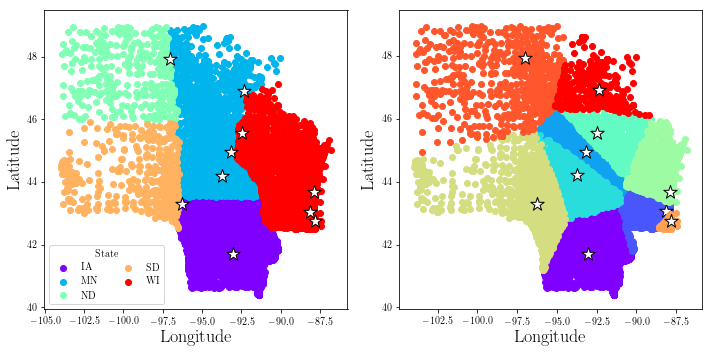

In [21]:
colorsStates = cm.rainbow(np.linspace(0, 1, len(states)))
colorsGroups = cm.rainbow(np.linspace(0, 1, len(km.group_.index)))

plt.figure(1, figsize=(10, 5))

# ==============================================
# Create the first subplot
# ==============================================


plt.subplot(1,2,1)            # Subplot 1 row x 2 columns (1st image)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

for i, state in enumerate(states):
    loc = km.block_['state'] == state
    plt.scatter(km.block_['lon'][loc], km.block_['lat'][loc], c=colorsStates[i], label=state)

for group in km.group_.index:
    plt.scatter(km.group_['lon'][group], km.group_['lat'][group], 
                s=200, marker='*', c='white', edgecolors='black')

plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=18)
plt.legend(loc='lower left', ncol=2, title='State')
plt.tight_layout()

# ==============================================
# Create the second subplot
# ==============================================

plt.subplot(1,2,2)            # Subplot 1 row x 2 columns (2nd image)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

for color, group in zip(colorsGroups, km.group_.index):

    loc = km.block_['group'] == group
    plt.scatter(km.block_['lon'][loc], km.block_['lat'][loc], c=color)
    plt.scatter(km.group_['lon'][group], km.group_['lat'][group], s=200, marker='*', c='white', edgecolors='black')

plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=18)
plt.tight_layout()

plt.show()

It appears that the *_assignGroup* function is doing a good job at assigning each block unit to the closest cluster. The next step is to update the information on the cluster, including updating the centroids of the cluster. This is done using the *_updateGroup()* function.

In [22]:
km._updateGroup()
print(km.group_)

         lat        lon  alpha      pop          area
0  41.740735 -92.972600      1  2464390  1.011541e+11
1  43.052950 -89.606638      1  2659834  2.898083e+10
2  45.079288 -93.535609      1  3886759  3.925599e+10
3  43.954756 -93.698187      1   920397  5.482475e+10
4  45.455637 -91.431875      1   736025  5.085462e+10
5  44.597447 -88.813235      1  1687111  4.678814e+10
6  43.893962 -98.966329      1  1310851  1.966547e+11
7  42.660509 -88.084593      1   446012  1.854920e+09
8  47.149621 -99.716787      1  1097076  2.762831e+11
9  47.262211 -92.675941      1   517647  6.958115e+10


A few more columns have been added to the group\_ dataframe: population and area. 

Let's look at the new centroid location

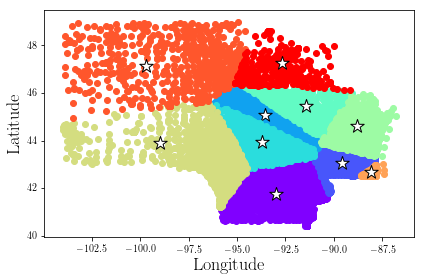

In [23]:
plt.figure(1)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

for color, group in zip(colorsGroups, km.group_.index):

    loc = km.block_['group'] == group
    plt.scatter(km.block_['lon'][loc], km.block_['lat'][loc], c=color)
    plt.scatter(km.group_['lon'][group], km.group_['lat'][group], s=200, marker='*', c='white', edgecolors='black')

plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=18)
plt.tight_layout()

plt.show()


There is a rather large difference in population between the clusters, which we would like to even out. This is where the *alpha* parameter comes in handy. It will begin to penalize clusters using the *_updateWeight()* function.

The process of assigning blocks to the nearest group, updating the group, and updating the weights is conveniently grouped in the function 

    km._cluster(N)
    
Which runs $N$ iterations of the sequence. Since $\alpha$ is currently dependent on the current iteration number out of $N$, it will only update to a different value if $N > 1$.

Let's run 20 iterations and see what happens.

In [24]:
km._cluster(20)

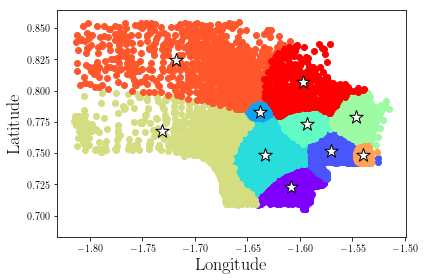

In [25]:
plt.figure(1)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

for color, group in zip(colorsGroups, km.group_.index):

    loc = km.block_['group'] == group
    plt.scatter(km.block_['lon'][loc], km.block_['lat'][loc], c=color)
    plt.scatter(km.group_['lon'][group], km.group_['lat'][group], s=200, marker='*', c='white', edgecolors='black')

plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=18)
plt.tight_layout()

plt.show()

The groups are becoming more compact geometically. If we look at the population in each group, we se that there are still some large imbalances, although the numbers are beginning to even out.

In [26]:
print(km.group_)

,lat,lon,alpha,pop,area
0,0.722567,-1.608609,0.058919,1106976,4.369481e+10
1,0.751937,-1.570469,0.088649,1416615,3.601114e+10
2,0.782978,-1.638099,0.177889,2860925,1.419331e+10
3,0.748261,-1.632939,0.033107,1829761,7.833672e+10
4,0.773414,-1.593596,0.093728,674869,2.833887e+10
5,0.778579,-1.546468,0.105370,1600648,3.659655e+10
6,0.767597,-1.731403,0.005397,1446194,2.414500e+11
7,0.748396,-1.539413,1.000000,1850093,5.087491e+09
8,0.824849,-1.717900,0.004958,1635294,2.997466e+11
9,0.806852,-1.597339,0.029479,1304727,8.277685e+10


If we run even more iterations, the populations get more evenly distributed and the groups are beginning to converge to their final shapes.

In [27]:
km._cluster(50)

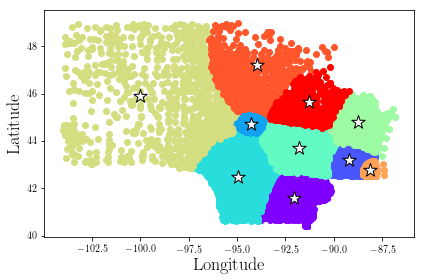

In [28]:
km._rad2deg()

plt.figure(1)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

for color, group in zip(colorsGroups, km.group_.index):
    loc = km.block_['group'] == group
    
    plt.scatter(km.block_['lon'][loc], km.block_['lat'][loc], c=color)
    plt.scatter(km.group_['lon'][group], km.group_['lat'][group], 
                s=200, marker='*', c='white', edgecolors='black')

plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=18)
plt.tight_layout()

plt.show()

In [29]:
print(km.group_)

,lat,lon,alpha,pop,area
0,41.596202,-92.081387,0.066840,1522807,5.330535e+10
1,43.174555,-89.201430,0.182478,1569764,2.286012e+10
2,44.722761,-94.266367,0.291824,1544848,1.688761e+10
3,42.487265,-94.923494,0.045125,1628836,9.504691e+10
4,43.695288,-91.794379,0.065881,1573912,6.014141e+10
5,44.800895,-88.755340,0.090203,1557023,4.221164e+10
6,45.898534,-100.023308,0.011438,1653505,4.060878e+11
7,42.778624,-88.140542,1.000000,1531850,3.433505e+09
8,47.218890,-93.986305,0.033420,1555139,1.161575e+11
9,45.639663,-91.268339,0.070475,1588418,5.010050e+10
